판다스 EDA 및 seaborn 차트

In [84]:
!pip install pydot
!pip install graphviz
!pip install datetime
!pip install scikit-learn

In [85]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import tree
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

데이터 불러오기
root_dir로 지정한 디렉토리에서 listdir 함수를 통해 해당 디렉토리내 모든 파일 리스트를 가져온다.

In [86]:
root_dir=os.getcwd()
f_lists=os.listdir(root_dir)
print("File Lists : ", f_lists)

File Lists :  ['.ipynb_checkpoints', 'increase.ipynb', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20

- 모든 파일 리스트가 담긴 리스트에서 요소를 하나 꺼내와서 f로 칭하며, f가 '.csv'로 끝나면 새로운 리스트로 구성한다.
- 데이터를 불러오는 코드와 비교시, 기존 f_lists에는 모든 파일이 들어가 있던 반면, new_file_lists는 파일 형식이 csv인 파일만 리스트에 남는다

In [87]:
new_file_lists = [f for f in f_lists if f.endswith('.csv')]
print("File Lists : ", new_file_lists)

File Lists :  ['kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.21.csv',

- error_list = new_file_lists[-1] -> 이 코드의 마지막 요소가 오류 데이터 리스트
- data_lists = new_file_lists[:-1] -> error_list를 제외한 나머지 부분이 정상 데이터 리스트

In [88]:
data_lists = new_file_lists[:-1]
error_list = new_file_lists[-1]
print("Data Lists : ", data_lists)
print("Error Data List : ", error_list)

Data Lists :  ['kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.21.csv',

파일에서 데이터를 읽어와 시간 정보 처리 함수 정의

새로운 DTime 및 갱신된 Time 열을 생성한 후 이를 포함하는 각 csv파일의 DataFrame을 반환

In [89]:
def csv_read_(data_dir, data_list):
    tmp = pd.read_csv(os.path.join(data_dir, data_list), sep=',', encoding='utf-8')
    y, m, d = map(int, data_list.split('-')[-1].split('.')[:-1])
    time = tmp['Time']
    tmp['DTime'] = '-'.join(data_list.split('-')[-1].split('.')[:-1])
    ctime = time.apply(lambda _ : _.replace(u'오후', 'PM').replace(u'오전', 'AM'))
    n_time = ctime.apply(lambda _ : datetime.datetime.strptime(_, "%p %I:%M:%S"))
    newtime = n_time.apply(lambda _ : _.replace(year=y, month=m, day=d))
    tmp['Time'] = newtime
    return tmp

생성한 변환 함수를 활용하여 data_lists에 있는 모든 데이터셋에 대해 실행하고 merge한다.
(Make Dedicated DataFrame)

In [90]:
dd = csv_read_(root_dir, data_lists[0])
for i in range(1, len(data_lists)):
    dd = pd.merge(dd, csv_read_(root_dir, data_lists[i]), how='outer')
dd

,Index,LoT,Time,pH,Temp,DTime
0,1,1,2021-09-06 09:01:18,1.02,47.18,2021-09-06
1,2,1,2021-09-06 09:01:23,1.05,47.34,2021-09-06
2,3,1,2021-09-06 09:01:28,1.09,48.45,2021-09-06
3,4,1,2021-09-06 09:01:33,1.12,48.46,2021-09-06
4,5,1,2021-09-06 09:01:38,1.15,48.47,2021-09-06
...,...,...,...,...,...,...
50089,1514,22,2021-10-27 11:14:41,2.79,51.83,2021-10-27
50090,1515,22,2021-10-27 11:14:46,3.62,42.20,2021-10-27
50091,1516,22,2021-10-27 11:14:51,3.40,41.88,2021-10-27
50092,1517,22,2021-10-27 11:14:56,3.59,40.62,2021-10-27


dd의 기술통계량을 요약하여 보여주는 함수

In [91]:
dd.describe()

,Index,LoT,Time,pH,Temp
count,50094.000000,50094.000000,50094,50094.000000,50094.000000
mean,759.500000,11.500000,2021-10-02 02:08:09.206511616,2.006488,49.876127
min,1.000000,1.000000,2021-09-06 09:01:18,1.010000,38.020000
25%,380.000000,6.000000,2021-09-16 09:34:29.249999872,1.560000,49.280000
50%,759.500000,11.500000,2021-10-01 10:07:48.500000,2.000000,49.970000
75%,1139.000000,17.000000,2021-10-15 10:41:49.750000128,2.440000,50.630000
max,1518.000000,22.000000,2021-10-27 11:15:01,3.990000,54.190000
std,438.213133,6.344352,NaN,0.551698,1.345322


 'dd' DataFrame에서 'Index' 열을 삭제한 새로운 DataFrame을 반환
 
  만약 'Index' 열이 없다면 dd가 그대로 반환

In [92]:
dd=dd.drop('Index', axis=1)
dd

,LoT,Time,pH,Temp,DTime
0,1,2021-09-06 09:01:18,1.02,47.18,2021-09-06
1,1,2021-09-06 09:01:23,1.05,47.34,2021-09-06
2,1,2021-09-06 09:01:28,1.09,48.45,2021-09-06
3,1,2021-09-06 09:01:33,1.12,48.46,2021-09-06
4,1,2021-09-06 09:01:38,1.15,48.47,2021-09-06
...,...,...,...,...,...
50089,22,2021-10-27 11:14:41,2.79,51.83,2021-10-27
50090,22,2021-10-27 11:14:46,3.62,42.20,2021-10-27
50091,22,2021-10-27 11:14:51,3.40,41.88,2021-10-27
50092,22,2021-10-27 11:14:56,3.59,40.62,2021-10-27


'dd' DataFrame에서 'Time' 열을 새로운 인덱스로 설정한 새로운 DataFrame을 반환 

'Time' 열은 이제 DataFrame의 인덱스로 사용되며, DataFrame의 내용은 변경되지 않는다.

In [93]:
dd=dd.set_index('Time')
dd

,LoT,pH,Temp,DTime
Time,,,,
2021-09-06 09:01:18,1,1.02,47.18,2021-09-06
2021-09-06 09:01:23,1,1.05,47.34,2021-09-06
2021-09-06 09:01:28,1,1.09,48.45,2021-09-06
2021-09-06 09:01:33,1,1.12,48.46,2021-09-06
2021-09-06 09:01:38,1,1.15,48.47,2021-09-06
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,2021-10-27
2021-10-27 11:14:46,22,3.62,42.20,2021-10-27
2021-10-27 11:14:51,22,3.40,41.88,2021-10-27


원본 데이터를 보존하고자 DataFrame인 dd를 복사하여 새로운 DataFrame을 생성

dedicated_data는 dd의 복사본이므로 dedicated_data를 조작해도 dd에는 영향을 미치지 않는다.

In [94]:
dedicated_data=dd.copy()
dedicated_data

,LoT,pH,Temp,DTime
Time,,,,
2021-09-06 09:01:18,1,1.02,47.18,2021-09-06
2021-09-06 09:01:23,1,1.05,47.34,2021-09-06
2021-09-06 09:01:28,1,1.09,48.45,2021-09-06
2021-09-06 09:01:33,1,1.12,48.46,2021-09-06
2021-09-06 09:01:38,1,1.15,48.47,2021-09-06
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,2021-10-27
2021-10-27 11:14:46,22,3.62,42.20,2021-10-27
2021-10-27 11:14:51,22,3.40,41.88,2021-10-27


dd의 복사본인 dedicated_data의 columns 확인

In [95]:
dedicated_data.columns

Index(['LoT', 'pH', 'Temp', 'DTime'], dtype='object')

dedicated_data의 기술통계량을 요약하여 보여주는 함수

In [96]:
dedicated_data.describe()

,LoT,pH,Temp
count,50094.000000,50094.000000,50094.000000
mean,11.500000,2.006488,49.876127
std,6.344352,0.551698,1.345322
min,1.000000,1.010000,38.020000
25%,6.000000,1.560000,49.280000
50%,11.500000,2.000000,49.970000
75%,17.000000,2.440000,50.630000
max,22.000000,3.990000,54.190000


 데이터프레임의 구조와 각 열의 데이터 타입, 비어있지 않은 값의 개수 등을 간단히 확인

 필요한 데이터 전처리 작업을 결정하는 데 도움

In [97]:
dedicated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50094 entries, 2021-09-06 09:01:18 to 2021-10-27 11:15:01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LoT     50094 non-null  int64  
 1   pH      50094 non-null  float64
 2   Temp    50094 non-null  float64
 3   DTime   50094 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


DataFrame의 크기를 확인할 수 있다.

In [98]:
dedicated_data.shape

(50094, 4)

DataFrame null(결측치) 값 개수 카운드

In [99]:
dedicated_data.isna().sum()

LoT      0
pH       0
Temp     0
DTime    0
dtype: int64

hist()함수를 통해 DataFrame의 Column 별 histogram을 시각화하여 데이터 분포 확인

array([[<Axes: title={'center': 'LoT'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'Temp'}>, <Axes: >]], dtype=object)

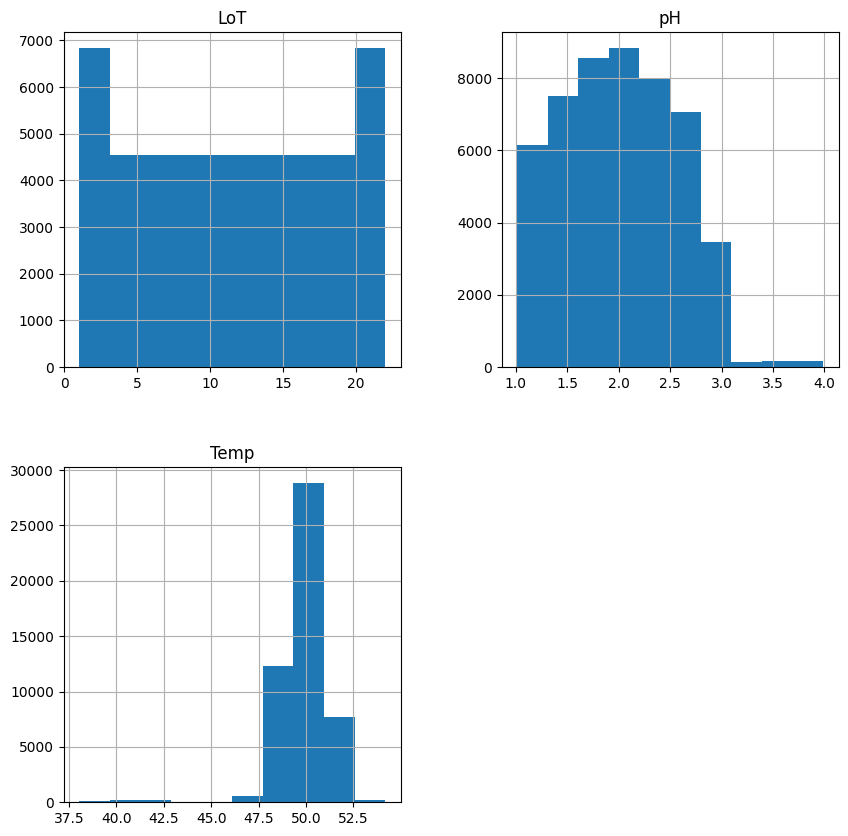

In [100]:
dedicated_data.hist(figsize=(10,10))

데이터 상관관계 분석

상관 계수는 보편적으로 사용되는 피어슨 상관 계수로서 -1과 1 사이의 값을 가진다. 상관 계수의 절대값이 1에 가까울수록 변수 간의 선형관계가 강하다고 볼 수 있으며, 값이 양수일 때는 양의 선형관계, 값이 음수일 때는 음의 선형관계를 가진다. 

In [109]:
tmpData = dedicated_data.filter(items=['LoT', 'pH', 'Temp'])
correlation = tmpData.corr()
correlation

,LoT,pH,Temp
LoT,1.000000,-0.001943,0.011561
pH,-0.001943,1.000000,0.474920
Temp,0.011561,0.474920,1.000000


데이터 상관관계 시각화

seaborn 패키지 내 heatmap()함수를 통해 상관관계 결과를 시각화
값이 클수록 상관관계가 있다고 판단하는 척도

<Axes: >

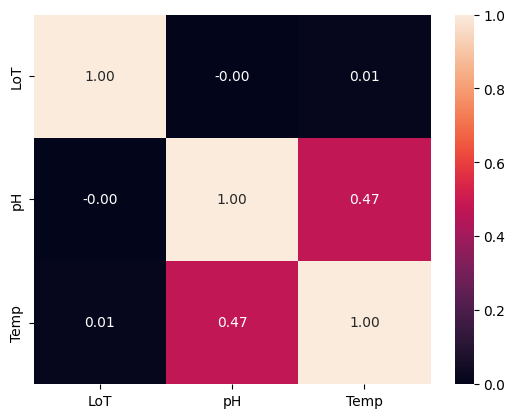

In [115]:
sns.heatmap(correlation, annot=True, fmt='.2f')

데이터 정제(전처리)
null 값 제거(결측치 제거)

In [117]:
dedicated_data= dedicate_data.dropna()
dedicate_data

,LoT,pH,Temp,DTime
Time,,,,
2021-09-06 09:01:18,1,1.02,47.18,2021-09-06
2021-09-06 09:01:23,1,1.05,47.34,2021-09-06
2021-09-06 09:01:28,1,1.09,48.45,2021-09-06
2021-09-06 09:01:33,1,1.12,48.46,2021-09-06
2021-09-06 09:01:38,1,1.15,48.47,2021-09-06
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,2021-10-27
2021-10-27 11:14:46,22,3.62,42.20,2021-10-27
2021-10-27 11:14:51,22,3.40,41.88,2021-10-27


LoT 열의 고유한 값들과 그 갯수를 확인

In [119]:
lot_lists=dedicated_data['LoT'].unique()
print(lot_lists)
print(len(lot_lists))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
22


DTime 열의 고유한 값들과 그 갯수를 확인

In [120]:
d_lists=dedicate_data['DTime'].unique()
print(d_lists)
print(len(d_lists))

['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']
33


join을 이용하여 디렉토리 경로인 root_dir과 파일이름인 error_list를 결합하는 역할

process라는 DataFrame에 csv 파일 저장

sep=','은 데이터의 구분자가 ,라는 것을 의미


In [121]:
process=pd.read_csv(os.path.join(root_dir, error_list), sep=',', encoding='utf-8')
process

,Date,LoT,Process Rate
0,2021-09-06,1,96.38
1,2021-09-06,2,97.40
2,2021-09-06,3,95.40
3,2021-09-06,4,96.35
4,2021-09-06,5,94.77
...,...,...,...
721,2021-10-27,18,97.29
722,2021-10-27,19,97.21
723,2021-10-27,20,98.38
724,2021-10-27,21,98.36


In [122]:
lot_process_lists=process['LoT'].unique()
d_process_lists=process['Date'].unique()
print("Unique LoT List :" , lot_process_lists)
print("Unique Date List :", d_process_lists)

Unique LoT List : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Unique Date List : ['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']


In [127]:
X_data = pd.DataFrame(columns=['pH', 'Temp', 'LoT', 'Process'])

In [131]:
X_data = pd.DataFrame(columns=['LoT', 'pH', 'Temp', 'Process'])

for d in d_lists:
    for lot in lot_lists:
        # Filter dedicated_data based on matching 'DTime' and 'LoT'
        tmp = dedicated_data[(dedicated_data['DTime'] == d) & (dedicated_data['LoT'] == lot)]
        # Extract relevant columns
        tmp = tmp[['pH', 'Temp', 'LoT']]
        # Filter process based on matching 'Date' and 'LoT', then get 'Process Rate'
        process_val = process[(process['Date'] == d) & (process['LoT'] == lot)]['Process Rate'].values
        # Create a NumPy array 'trr' with the same shape as 'tmp['pH']' and fill it with 'process_val'
        trr = np.full((tmp['pH'].shape), process_val)
        # Add 'Process' column to 'tmp' DataFrame and assign 'trr' to it
        tmp['Process'] = trr
        # Append 'tmp' DataFrame to 'X_data'
        X_data = X_data.append(tmp)

# Convert all columns to numeric
X_data = X_data.apply(pd.to_numeric)
# Rearrange columns
X_data = X_data[['LoT', 'pH', 'Temp', 'Process']]

AttributeError: 'DataFrame' object has no attribute 'append'